In [40]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [41]:
df = pd.read_csv('rappi_challenge_clean.csv')

In [42]:
df.head()

,Unnamed: 0,transaction_id,user_id,genero,linea_tc,interes_tc,monto,fecha,hora,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude,anio,marca,proveedor
0,0,1,573,M,87000,56,581.03,02/01/20,0,Farmacia,Ciudad de México,Aceptada,False,0.0,17.43,False,2019,Apple,Telcel
1,1,2,737,F,34000,51,421.73,02/01/20,0,Tienda departamental,Cancún,Aceptada,False,0.0,12.65,False,2021,Huawei,ATT
2,2,3,887,F,52000,38,399.55,02/01/20,0,Farmacia,Tijuana,En proceso,False,0.0,11.99,False,2017,Apple,ATT
3,3,4,1304,M,67000,60,828.01,02/01/20,0,Tienda departamental,Ciudad de México,En proceso,False,0.0,24.84,False,2019,Samsung,ATT
4,4,5,1361,F,28000,52,886.04,02/01/20,0,Supermercado,Cancún,Aceptada,False,0.0,26.58,False,2021,Samsung,Telcel


In [43]:
df = df.drop(['Unnamed: 0'], axis=1)

In [44]:
df2 = df.copy()

In [45]:
df2.head()

,transaction_id,user_id,genero,linea_tc,interes_tc,monto,fecha,hora,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude,anio,marca,proveedor
0,1,573,M,87000,56,581.03,02/01/20,0,Farmacia,Ciudad de México,Aceptada,False,0.0,17.43,False,2019,Apple,Telcel
1,2,737,F,34000,51,421.73,02/01/20,0,Tienda departamental,Cancún,Aceptada,False,0.0,12.65,False,2021,Huawei,ATT
2,3,887,F,52000,38,399.55,02/01/20,0,Farmacia,Tijuana,En proceso,False,0.0,11.99,False,2017,Apple,ATT
3,4,1304,M,67000,60,828.01,02/01/20,0,Tienda departamental,Ciudad de México,En proceso,False,0.0,24.84,False,2019,Samsung,ATT
4,5,1361,F,28000,52,886.04,02/01/20,0,Supermercado,Cancún,Aceptada,False,0.0,26.58,False,2021,Samsung,Telcel


In [46]:
not_fraud_count, fraud_count = np.bincount(df2["fraude"])
not_fraud_count, fraud_count

(25837, 804)

In [47]:
total_count = not_fraud_count + fraud_count
print(
    (
        f"Data:\n"
        f"    Total: {total_count}\n"
        f"    Fraud: {fraud_count} ({100 * fraud_count / total_count:.2f}% of total)\n"
    )
)

Data:
    Total: 26641
    Fraud: 804 (3.02% of total)



In [12]:
# df2['is_weekend'] = False
# for i in range(len(df2)):
#   if df2['fecha'].iloc[i] in ('03/01/20','04/01/20', '05/01/20', '10/01/20','11/01/20', '12/01/20', '17/01/20','18/01/20', '19/01/20', '24/01/20','25/01/20', '26/01/20'):
#     df2['is_weekend'] = True

In [13]:
# df2["is_night"] = (df2["hora"] <= 6) & (df2["hora"] >= 21)

In [14]:
# df2['fecha'] = pd.to_datetime(df2['fecha'], format='%d/%m/%y')

In [15]:
# df2['customer_transactions_per_day'] = df2.groupby(['user_id', 'fecha'])['transaction_id'].transform('count')

In [48]:
df2.head()

,transaction_id,user_id,genero,linea_tc,interes_tc,monto,fecha,hora,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude,anio,marca,proveedor
0,1,573,M,87000,56,581.03,02/01/20,0,Farmacia,Ciudad de México,Aceptada,False,0.0,17.43,False,2019,Apple,Telcel
1,2,737,F,34000,51,421.73,02/01/20,0,Tienda departamental,Cancún,Aceptada,False,0.0,12.65,False,2021,Huawei,ATT
2,3,887,F,52000,38,399.55,02/01/20,0,Farmacia,Tijuana,En proceso,False,0.0,11.99,False,2017,Apple,ATT
3,4,1304,M,67000,60,828.01,02/01/20,0,Tienda departamental,Ciudad de México,En proceso,False,0.0,24.84,False,2019,Samsung,ATT
4,5,1361,F,28000,52,886.04,02/01/20,0,Supermercado,Cancún,Aceptada,False,0.0,26.58,False,2021,Samsung,Telcel


In [49]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [50]:
df2.head()

,transaction_id,user_id,genero,linea_tc,interes_tc,monto,fecha,hora,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude,anio,marca,proveedor
0,1,573,M,87000,56,581.03,02/01/20,0,Farmacia,Ciudad de México,Aceptada,False,0.0,17.43,False,2019,Apple,Telcel
1,2,737,F,34000,51,421.73,02/01/20,0,Tienda departamental,Cancún,Aceptada,False,0.0,12.65,False,2021,Huawei,ATT
2,3,887,F,52000,38,399.55,02/01/20,0,Farmacia,Tijuana,En proceso,False,0.0,11.99,False,2017,Apple,ATT
3,4,1304,M,67000,60,828.01,02/01/20,0,Tienda departamental,Ciudad de México,En proceso,False,0.0,24.84,False,2019,Samsung,ATT
4,5,1361,F,28000,52,886.04,02/01/20,0,Supermercado,Cancún,Aceptada,False,0.0,26.58,False,2021,Samsung,Telcel


In [51]:
df2.dtypes

transaction_id       int64
user_id              int64
genero              object
linea_tc             int64
interes_tc           int64
monto              float64
fecha               object
hora                 int64
establecimiento     object
ciudad              object
status_txn          object
is_prime              bool
dcto               float64
cashback           float64
fraude                bool
anio                 int64
marca               object
proveedor           object
dtype: object

In [52]:
df3 = df2.copy()

In [53]:
df3 = df3.drop(['transaction_id', 'user_id', 'fecha', 'dcto', 'cashback', 'anio'], axis=1)

In [54]:
df3.head()

,genero,linea_tc,interes_tc,monto,hora,establecimiento,ciudad,status_txn,is_prime,fraude,marca,proveedor
0,M,87000,56,581.03,0,Farmacia,Ciudad de México,Aceptada,False,False,Apple,Telcel
1,F,34000,51,421.73,0,Tienda departamental,Cancún,Aceptada,False,False,Huawei,ATT
2,F,52000,38,399.55,0,Farmacia,Tijuana,En proceso,False,False,Apple,ATT
3,M,67000,60,828.01,0,Tienda departamental,Ciudad de México,En proceso,False,False,Samsung,ATT
4,F,28000,52,886.04,0,Supermercado,Cancún,Aceptada,False,False,Samsung,Telcel


In [55]:
new_data = df3[['genero', 'establecimiento', 'ciudad', 'status_txn', 'marca', 'proveedor']]
for col in new_data.columns:
  new_data = pd.get_dummies(new_data, columns=[col], prefix=[col], drop_first=True)

In [56]:
df3 = df3.drop(['genero', 'establecimiento', 'ciudad', 'status_txn', 'marca', 'proveedor'],axis=1)

In [57]:
df3 = pd.concat([df3, new_data], axis=1)

In [58]:
df3.head()

,linea_tc,interes_tc,monto,hora,is_prime,fraude,genero_M,genero_N,establecimiento_Compra en línea,establecimiento_Farmacia,establecimiento_Supermercado,establecimiento_Tienda departamental,establecimiento_Unknown,ciudad_Ciudad de México,ciudad_Guadalajara,ciudad_Monterrey,ciudad_Nezahualcóyotl,ciudad_Tijuana,ciudad_Toluca,status_txn_En proceso,status_txn_Rechazada,marca_Huawei,marca_Motorola,marca_Samsung,proveedor_Movistar,proveedor_Telcel
0,87000,56,581.03,0,False,False,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,34000,51,421.73,0,False,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,52000,38,399.55,0,False,False,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,67000,60,828.01,0,False,False,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,28000,52,886.04,0,False,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [59]:
#split dataset into features and label
X= df3.drop(labels='fraude',axis=1)
y= df3['fraude']

In [60]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_ros, y_ros = ros.fit_resample(X, y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({False: 25837, True: 804})
Resample dataset shape Counter({False: 25837, True: 25837})


In [61]:
#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_ros,y_ros, test_size=0.2, random_state=0)

In [62]:
# will try to use below two models that are RandomForestClassifier and XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [190]:
# #create param
# model_param = {
#     'RandomForestClassifier':{
#         'model':RandomForestClassifier(),
#         'param':{
#             'n_estimators': [10, 50, 100, 130], 
#             'criterion': ['gini', 'entropy'],
#             'max_depth': range(2, 4, 1), 
#             'max_features': ['auto', 'log2']
#         }
#     },
#     'XGBClassifier':{
#         'model':XGBClassifier(objective='binary:logistic'),
#         'param':{
#            'learning_rate': [0.5, 0.1, 0.01, 0.001],
#             'max_depth': [3, 5, 10, 20],
#             'n_estimators': [10, 50, 100, 200]
#         }
#     }
# }

In [191]:
# scores =[]
# for model_name, mp in model_param.items():
#     model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
#     model_selection.fit(X_ros,y_ros)
#     scores.append({
#         'model': model_name,
#         'best_score': model_selection.best_score_,
#         'best_params': model_selection.best_params_
#     })

In [63]:
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=20,n_estimators=200)

In [64]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [65]:
model_xgb.score(X_test,y_test)

0.9955491049830673

In [35]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[5060,   28],
       [   0, 5247]], dtype=int64)

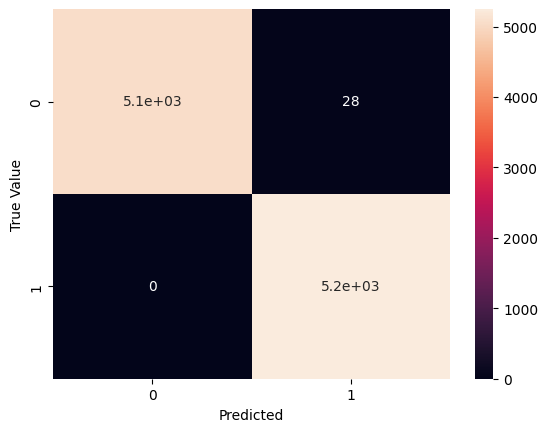

In [36]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

# Pickle the model file for deployment


In [37]:
import pickle

In [81]:
pickle.dump(model_xgb, open('xgbmodel.pkl', 'wb'))